# Likelihoods check 

For Bayesian inference we need nicely behaved likelihood surfaces. 

Lets see what these look like

# Setup 

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
try:
    sys.path.remove("../src") # Remove src if already exists 
except:
    pass
sys.path.append("../src") # Means that I dont have to make src/ a proper python package

# Synthetic data 

We generate synthetic data to test our scheme. 

Lets make sure this looks reasonable 

In [10]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
import numpy as np 
from model import PhaseModel
from kalman_filter_optimised import KalmanFilter
from priors import bilby_priors_dict
import matplotlib.pyplot as plt 



P   = SystemParameters(σm=5e-7)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    




def iterate_over_ll(data,parameter_name,parameter_value,P,PTA):
   

    #Define the model to be used by the Kalman Filter
    model = PhaseModel(P,PTA)


    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.phi_measured,PTA)


    inits, constrained_prior = bilby_priors_dict(PTA,P,set_state_parameters_as_known=True,set_measurement_parameters_as_known=True)
    optimal_parameters = constrained_prior.sample(1)
    optimal_parameters[parameter_name] = np.array([parameter_value])
    ll = KF.likelihood(optimal_parameters)

    return ll 



# $\Omega$ 

First $\Omega$ over a broad parameter range

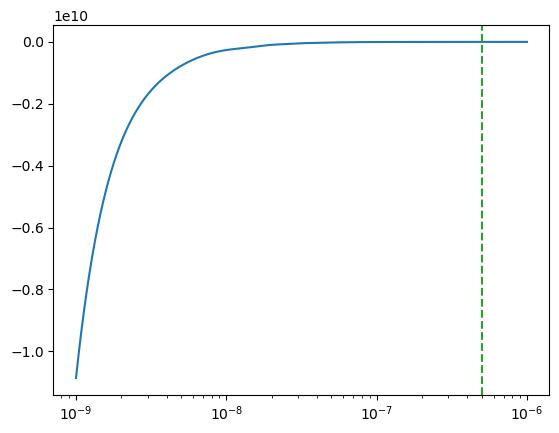

In [15]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "omega_gw"
N = 1000
parameter_values = np.logspace(-9,-6,N)



likelihoods_omega = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_omega[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_omega)
plt.axvline(5e-7,linestyle='--', c='C2')
plt.xscale('log')


and now a narrow range close to the true injection

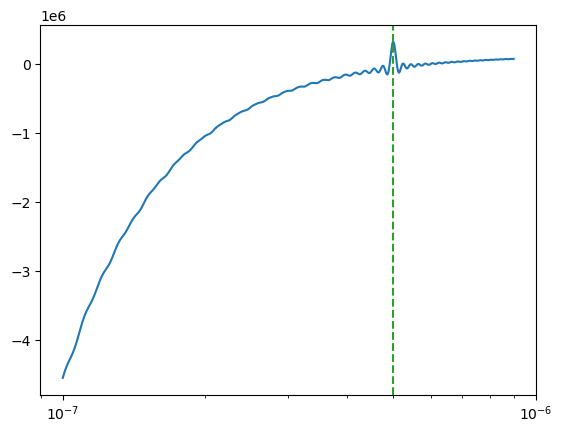

In [17]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "omega_gw"
N = 1000
parameter_values = np.arange(1e-7,9e-7,1e-9)


likelihoods_omega = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_omega[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_omega)
plt.axvline(5e-7,linestyle='--', c='C2')
plt.xscale('log')


# $\Phi_0$

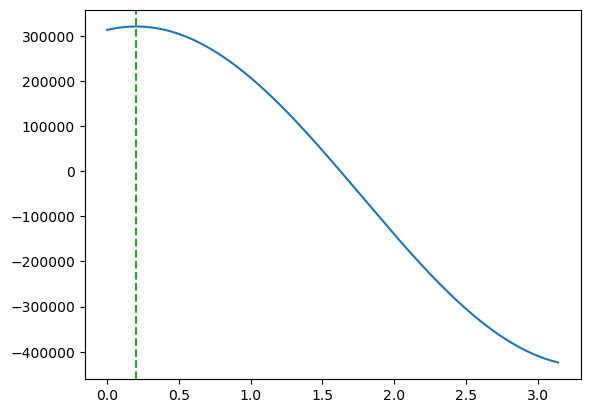

In [18]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "phi0_gw"
N = 1000
parameter_values = np.linspace(0,np.pi,N)


likelihoods_phi = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_phi[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)


plt.plot(parameter_values,likelihoods_phi)
plt.axvline(0.2,linestyle='--', c='C2')


# $\psi$

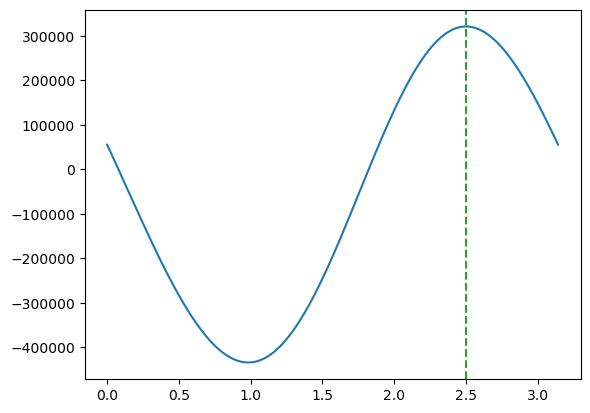

In [19]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "psi_gw"
N = 1000
parameter_values = np.linspace(0,np.pi,N)


likelihoods_psi = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_psi[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)


plt.plot(parameter_values,likelihoods_psi)
plt.axvline(2.50,linestyle='--', c='C2')


# $\delta$ 

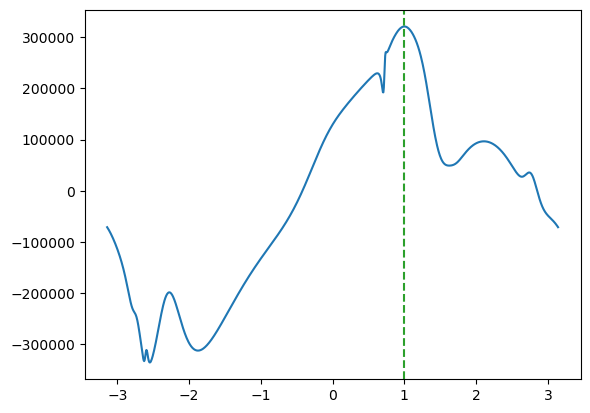

In [20]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "delta_gw"
N = 1000
parameter_values = np.linspace(-np.pi,np.pi,N)


likelihoods_delta = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_delta[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_delta)
plt.axvline(1.0,linestyle='--', c='C2')


# $\alpha$ 

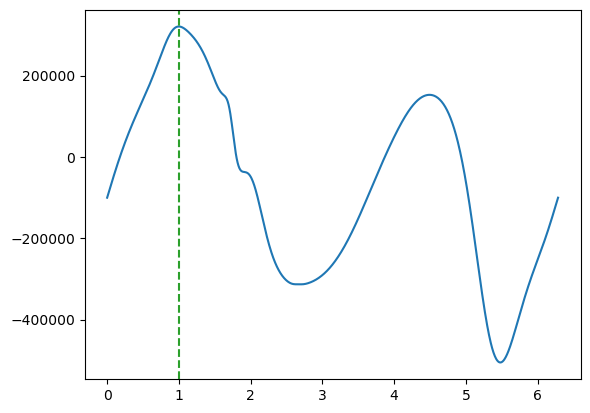

In [21]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "alpha_gw"
N = 1000
parameter_values = np.linspace(0.0,2*np.pi,N)


likelihoods_alpha = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_alpha[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_alpha)
plt.axvline(1.0,linestyle='--', c='C2')


# Iota 

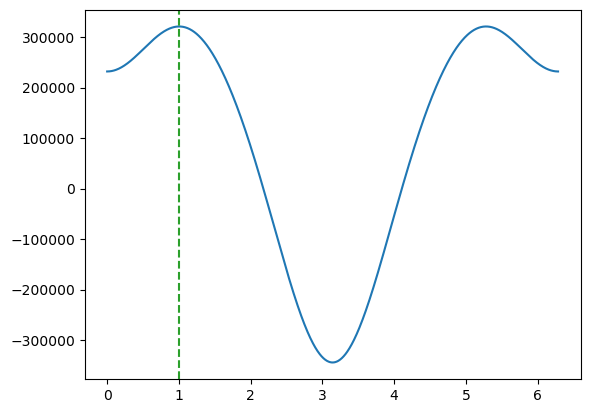

In [22]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "iota_gw"
N = 1000
parameter_values = np.linspace(0.0,2*np.pi,N)


likelihoods_iota = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_iota[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_iota)
plt.axvline(1.0,linestyle='--', c='C2')



# h 

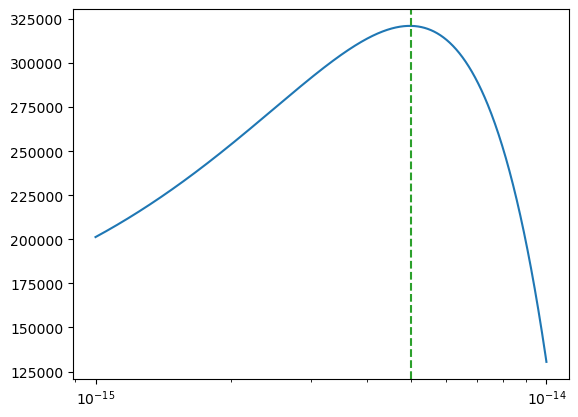

In [23]:
import logging 
logger = logging.getLogger()
logger.disabled = True

parameter_name = "h"
N = 1000
parameter_values = np.logspace(-15,-14,N)


likelihoods_h = np.zeros_like(parameter_values)
for i,parameter_value in enumerate(parameter_values):
    likelihoods_h[i] = iterate_over_ll(data,parameter_name,parameter_value,P,PTA)




plt.plot(parameter_values,likelihoods_h)
plt.axvline(5e-15,linestyle='--', c='C2')
plt.xscale('log')
